## notebook for training image classifiers

using sklearn to create models for classifying images

In [95]:
import pandas as pd
import sklearn
from skimage import data, io, filters
import csv
import matplotlib.image as mpimg
%matplotlib inline

### load training image labels stored in csv:

In [96]:
tattoo_training_labels_df = pd.read_csv('/Users/kylefrankovich/Desktop/insight_training_data/tattoo_training_image_labels.csv')
number_of_tattoo_images = len(tattoo_training_labels_df[tattoo_training_labels_df['category'] == 1])
number_of_non_tattoo_images = len(tattoo_training_labels_df[tattoo_training_labels_df['category'] == 0])
print('total labeled images:', len(tattoo_training_labels_df))
print('number of labeled tattoos:', number_of_tattoo_images)
print('number of labeled non-tattoo:', number_of_non_tattoo_images)

total labeled images: 2306
number of labeled tattoos: 1000
number of labeled non-tattoo: 1306


In [97]:
tattoo_df = tattoo_training_labels_df[tattoo_training_labels_df['category'] == 1]
non_tattoo_df = tattoo_training_labels_df[tattoo_training_labels_df['category'] == 0]

# check results w/ 500 images, to compare with full 1000/category
tattoo_df = tattoo_df.iloc[0:1000,:] # select first 500 tattoo rows for even categories
non_tattoo_df = non_tattoo_df.iloc[0:1000,:] # select first 500 non-tattoo rows for even categories
print(len(tattoo_df))
print(len(non_tattoo_df))

1000
1000


### export list of files to copy images into specific labeled folders:

In [92]:
tattoo_file_names = list(tattoo_df['file_name'])
tattoo_labels = list(tattoo_df['category'])
non_tattoo_file_names = list(non_tattoo_df['file_name'])
non_tattoo_labels = list(non_tattoo_df['category'])

csv_output_file = '/Users/kylefrankovich/Desktop/training_data/non_tattoo_files_to_move_1000.csv'

new_folder = '/Users/kylefrankovich/Desktop/training_data/'

#Assuming res is a flat list
with open(csv_output_file, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in non_tattoo_file_names:
        writer.writerow([val])
        
# moving a list of files to a new directory:

# cp `cat list.txt` new_folder

# cp `cat /Users/kylefrankovich/Desktop/training_data/tattoo_files_to_move_1000.csv` '/Users/kylefrankovich/Desktop/training_data/tattoo'

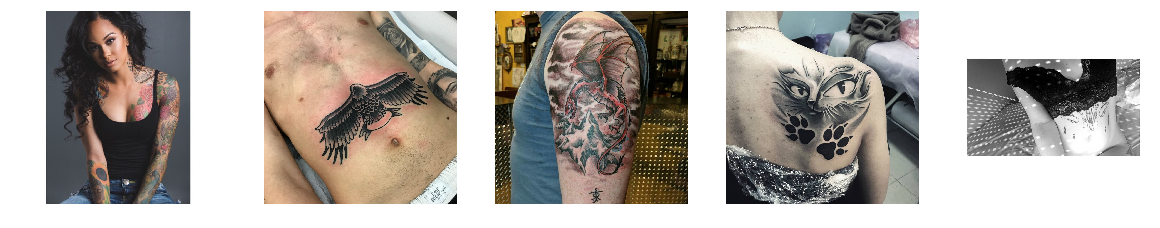

In [93]:
# look at labeled tattoo images:
preview_tattoo_filenames = tattoo_file_names[0:5]

images = []
for img_path in preview_tattoo_filenames[0:5]:
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

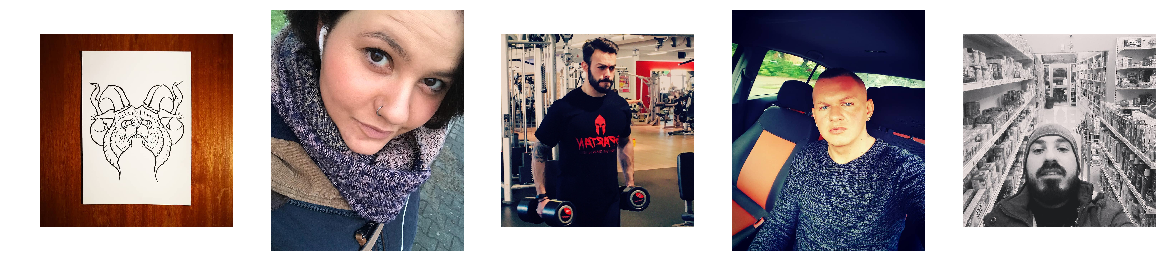

In [94]:
# look at labeled non_tattoo images:
preview_non_tattoo_filenames = non_tattoo_file_names[0:5]

images = []
for img_path in preview_non_tattoo_filenames[0:5]:
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

In [20]:
frames = [tattoo_df,non_tattoo_df]
df = pd.concat(frames)
df.head(10)

,file_name,category
4,/Users/kylefrankovich/Desktop/insight_training...,1
5,/Users/kylefrankovich/Desktop/insight_training...,1
7,/Users/kylefrankovich/Desktop/insight_training...,1
8,/Users/kylefrankovich/Desktop/insight_training...,1
10,/Users/kylefrankovich/Desktop/insight_training...,1
11,/Users/kylefrankovich/Desktop/insight_training...,1
15,/Users/kylefrankovich/Desktop/insight_training...,1
16,/Users/kylefrankovich/Desktop/insight_training...,1
18,/Users/kylefrankovich/Desktop/insight_training...,1
20,/Users/kylefrankovich/Desktop/insight_training...,1


In [21]:
print('Image Data Shape', df.shape)

Image Data Shape (1000, 2)


### testing out skimage:

303


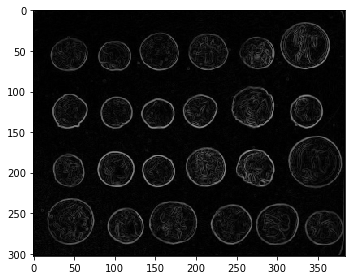

In [26]:
image = data.coins()
print(len(image))
edges = filters.sobel(image)
io.imshow(edges)
io.show()

### logistic regression example using MNIST dataset:

In [27]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [28]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In [32]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

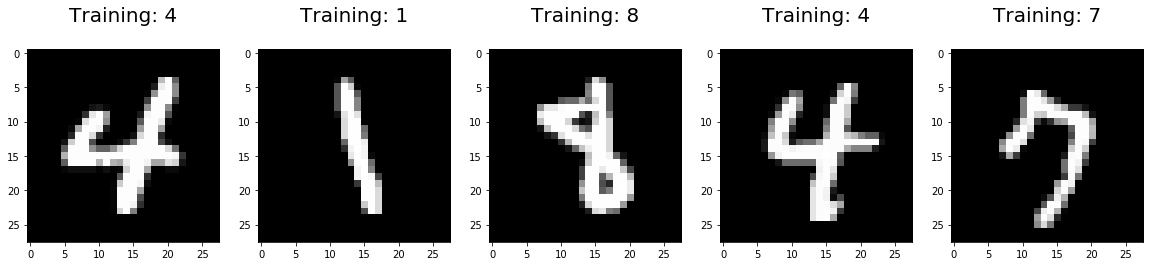

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [37]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [38]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
# Returns a NumPy Array
# Predict for multiple Observations (images)
logisticRegr.predict(test_img[0:10])

array([ 1.,  9.,  2.,  2.,  7.,  1.,  8.,  3.,  3.,  7.])

In [41]:
predictions = logisticRegr.predict(test_img)

In [42]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9131


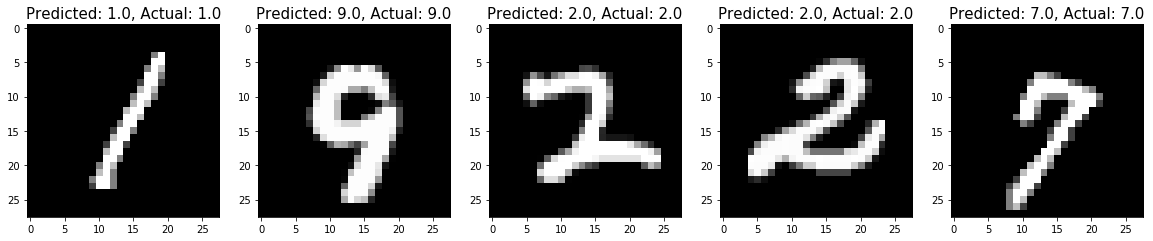

In [48]:
# show misclassed images:

import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
        index +=1
        
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

### add feature(s) to dataframe:

### logistic regression:

In [ ]:
scaler=StandardScaler().fit(dfClean)
scaled=scaler.transform(dfClean)
X=scaled
y=dfAll['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

c=1
model = LogisticRegression(C=c,penalty='l1',fit_intercept=True)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
kfold = model_selection.KFold(n_splits=n_fold, random_state=10)
scoring = 'roc_auc' 
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [66]:
from io import StringIO
from io import BytesIO
from PIL import Image

In [64]:
def process_image_file(image_path):
    '''Given an image path it returns its feature vector.
    Args:
      image_path (str): path of the image file to process.
    Returns:
      list of float: feature vector on success, None otherwise.
    '''
    image_fp = BytesIO(open(image_path, 'rb').read())
    try:
        image = Image.open(image_fp)
        return process_image(image)
    except IOError:
        return None

In [59]:
def process_image(image, blocks=4):
    '''Given a PIL Image object it returns its feature vector.
    Args:
      image (PIL.Image): image to process.
      blocks (int, optional): number of block to subdivide the RGB space into.
    Returns:
      list of float: feature vector if successful. None if the image is not
      RGB.
    '''
    if not image.mode == 'RGB':
        return None
    feature = [0] * blocks * blocks * blocks
    pixel_count = 0
    for pixel in image.getdata():
        ridx = int(pixel[0]/(256/blocks))
        gidx = int(pixel[1]/(256/blocks))
        bidx = int(pixel[2]/(256/blocks))
        idx = ridx + gidx * blocks + bidx * blocks * blocks
        feature[idx] += 1
        pixel_count += 1
    return [x/pixel_count for x in feature]

In [56]:
test_image = tattoo_df.iloc[0]['file_name']

In [67]:
process_image_file(test_image)

[0.23405692729766803,
 0.01912551440329218,
 1.7146776406035666e-05,
 0.0,
 0.00023662551440329217,
 0.010528120713305899,
 0.0007098765432098765,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008285322359396434,
 0.0005006858710562414,
 0.0,
 0.0,
 0.006841563786008231,
 0.3069650205761317,
 0.039152949245541836,
 0.0013648834019204389,
 0.0,
 0.0010939643347050755,
 0.019015775034293553,
 0.017421124828532236,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00013374485596707818,
 0.0043621399176954736,
 0.00038751714677640606,
 0.00018861454046639232,
 0.0,
 0.004945130315500686,
 0.014300411522633744,
 0.05198902606310014,
 0.0,
 0.0,
 8.573388203017832e-05,
 0.004478737997256516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.02880658436214e-05,
 0.00020576131687242798,
 0.0,
 0.0,
 0.0,
 3.08641975308642e-05,
 0.2535665294924554]

In [62]:
image_fp = BytesIO(open(test_image, 'rb').read())

In [63]:
image_fp